# Diffeomorphic Temporal Alignment Nets (DTAN) Usage Examples

## On the importance of the smoothness prior ($F_{reg}$)
An example of time-series joint alignment via DTAN with and without the smoothness prior. <br>
Applying the prior serves as a regularization term, constraining the magnitude of the transformation and 
encourging smooth velocity fields (the correlation between them).

# Setup

In [8]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
import argparse
import torch

if module_path not in sys.path:
    sys.path.append(module_path)

# From helper
from helper.plotting_torch import plot_signals
from helper.UCR_loader import get_UCR_data

# from models
from models.train_utils import ExperimentsManager, DTAN_args
from models.train_model import train

In [9]:
# Jupyter args
# load changes from imports every 2 seconds
%load_ext autoreload
%autoreload 2

# Matplotlib
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Declare variables


In [10]:

# Data
datadir = "../data/"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
dataset_name = "ECGFiveDays"
# Plotting flag
plot_signals_flag = True

# Experiments, this names will serve as the checkpoints name
exp_1 = dataset_name + "with_prior"
exp_2 = "_without_prior"

exps_names = [exp_1, exp_2] 

## Create experiments class

In [11]:
"""
We use the ExperimentsManager to store the two experiments we are about to run
The DTAN_args() is used to store variables related to DTAN
    and not general training ones such as "learining_rate" or "epochs"
    
You can custimize the trainning shemce, network architecture and more in the scripts themself.

"""

# Init an instance of the experiment class. Holds results
# and trainning param such as lr, n_epochs etc
expManager = ExperimentsManager()
# Create 2 experiments class
expManager.add_experiment(exp_1, n_epochs=200, batch_size=64, lr=0.001, device=device)
expManager.add_experiment(exp_2, n_epochs=200, batch_size=64, lr=0.001, device=device)

# Arguments for DTAN class
# DTAN args with smoothness prior
DTANargs1 = DTAN_args(tess_size=32,
                      smoothness_prior=True,
                      lambda_smooth=1,
                      lambda_var=0.1,
                      n_recurrences=1,
                      zero_boundary=True,
                      )

# DTAN args tess 4
DTANargs2 = DTAN_args(tess_size=32,
                      smoothness_prior=False,
                      n_recurrences=1,
                      zero_boundary=True,
                      )

# add args to the experiments manager
expManager[exp_1].add_DTAN_arg(DTANargs1)
expManager[exp_2].add_DTAN_arg(DTANargs2)


# Train models

In [12]:
datadir = "../examples/data/"

for exp in exps_names:
    print(exp)
    # get current experiment
    Experiment = expManager[exp]
    DTANargs = Experiment.get_DTAN_args()
    
    # get data loaders
    train_loader, validation_loader, test_loader = get_UCR_data(datadir,
                                                                dataset_name=dataset_name,
                                                                batch_size=Experiment.batch_size)


    # Train model
    model = train(train_loader, validation_loader, DTANargs, Experiment, print_model=True)
    
    Experiment.add_DTAN_model(model)


  0%|          | 0/200 [00:00<?, ?it/s]

ECGFiveDayswith_prior
ECGFiveDays dataset details:
    X train.shape: (23, 1, 136)
    X test.shape: (861, 1, 136)
    y train.shape: (23,)
    y test.shape: (861,)
    number of classes: 2
    number of samples: 23
    data sample dim: (1, 136)
device cuda
DTAN(
  (localization): Sequential(
    (0): Conv1d(1, 128, kernel_size=(7,), stride=(1,))
    (1): MaxPool1d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU(inplace=True)
    (3): Conv1d(128, 64, kernel_size=(9,), stride=(1,))
    (4): MaxPool1d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
    (5): ReLU(inplace=True)
    (6): Conv1d(64, 64, kernel_size=(3,), stride=(1,))
    (7): MaxPool1d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): ReLU(inplace=True)
  )
  (fc_loc): Sequential(
    (0): Linear(in_features=448, out_features=16, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=16, out_features=31, bias=True)
    (3): Tanh()
  )
)
{'tes

 30%|██▉       | 59/200 [00:00<00:02, 60.68it/s]


Train set: Average loss: 0.0029

Validation set: Average loss: 0.0001



 54%|█████▍    | 108/200 [00:01<00:01, 61.31it/s]


Train set: Average loss: 0.0028

Validation set: Average loss: 0.0001



 78%|███████▊  | 157/200 [00:02<00:00, 61.76it/s]


Train set: Average loss: 0.0027

Validation set: Average loss: 0.0001



  6%|▌         | 12/200 [00:00<00:01, 117.01it/s]


Train set: Average loss: 0.0026

Validation set: Average loss: 0.0001

_without_prior
ECGFiveDays dataset details:
    X train.shape: (23, 1, 136)
    X test.shape: (861, 1, 136)
    y train.shape: (23,)
    y test.shape: (861,)
    number of classes: 2
    number of samples: 23
    data sample dim: (1, 136)
device cuda
DTAN(
  (localization): Sequential(
    (0): Conv1d(1, 128, kernel_size=(7,), stride=(1,))
    (1): MaxPool1d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU(inplace=True)
    (3): Conv1d(128, 64, kernel_size=(9,), stride=(1,))
    (4): MaxPool1d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
    (5): ReLU(inplace=True)
    (6): Conv1d(64, 64, kernel_size=(3,), stride=(1,))
    (7): MaxPool1d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): ReLU(inplace=True)
  )
  (fc_loc): Sequential(
    (0): Linear(in_features=448, out_features=16, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_fea

 34%|███▎      | 67/200 [00:00<00:01, 129.30it/s]


Train set: Average loss: 0.0025

Validation set: Average loss: 0.0000



 60%|██████    | 120/200 [00:00<00:00, 128.56it/s]


Train set: Average loss: 0.0019

Validation set: Average loss: 0.0000



 88%|████████▊ | 175/200 [00:01<00:00, 129.49it/s]


Train set: Average loss: 0.0018

Validation set: Average loss: 0.0000



100%|██████████| 200/200 [00:01<00:00, 129.54it/s]


Train set: Average loss: 0.0018

Validation set: Average loss: 0.0000



# With smoothness prior

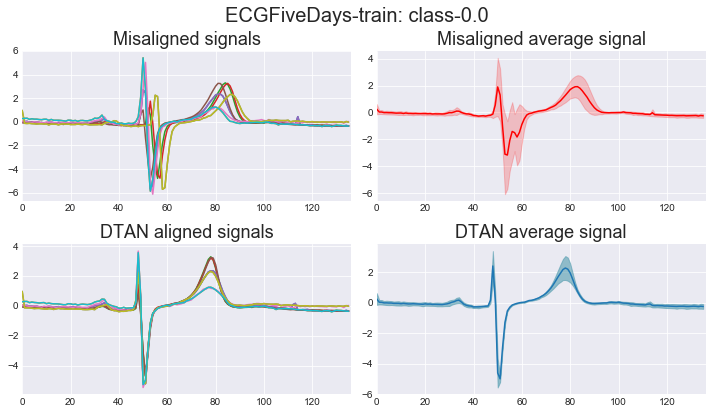

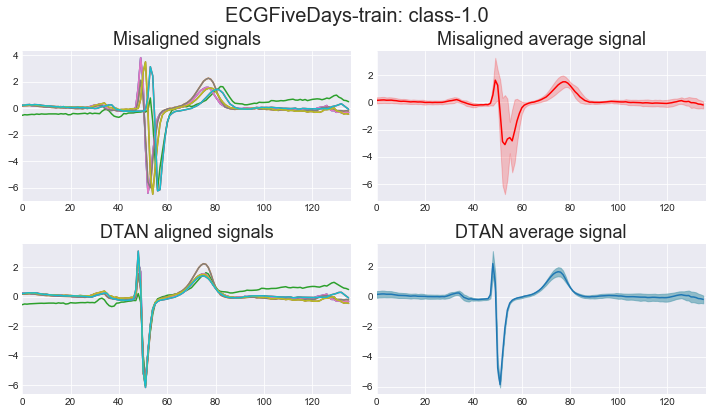

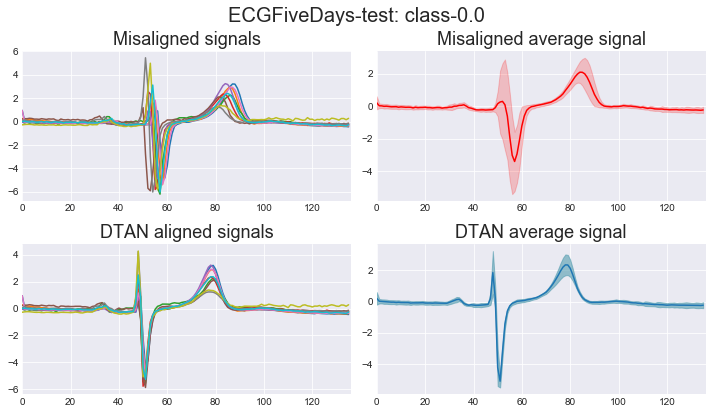

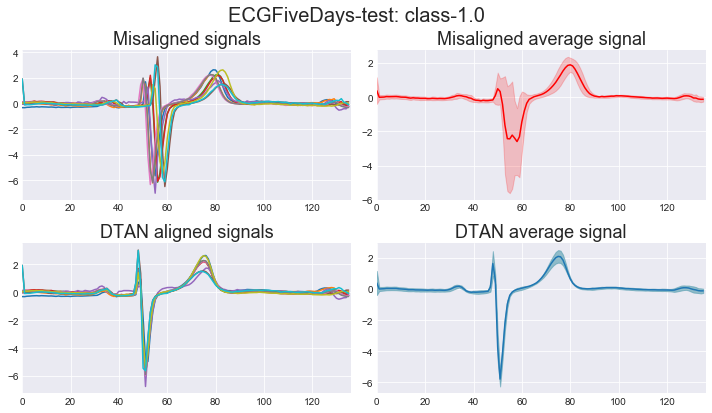

In [13]:
import matplotlib.pyplot as plt
# Plot aligned signals
model = expManager[exp_1].get_DTAN_model()
plot_signals(model, device, datadir, dataset_name)

# Without smoothness prior
Since DTAN framework is unsupervised (in terms of alignment), <br>
the data loss term, within-class variance, could be minimized by unrealistically-large deformations. <br>
The smoothness prior help preventing that.

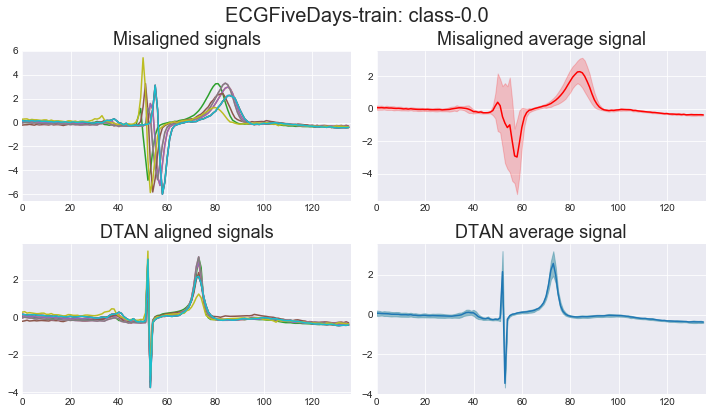

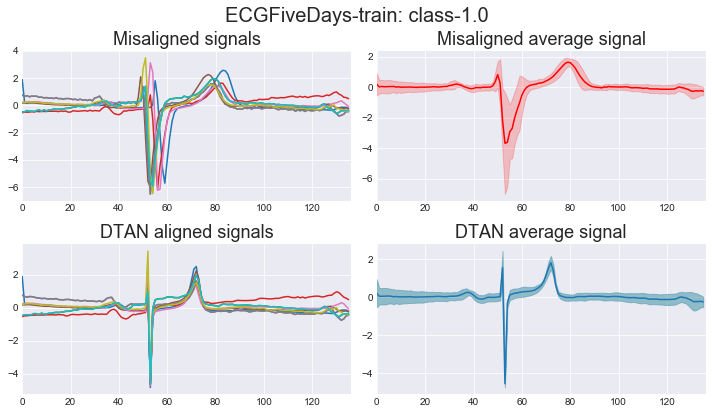

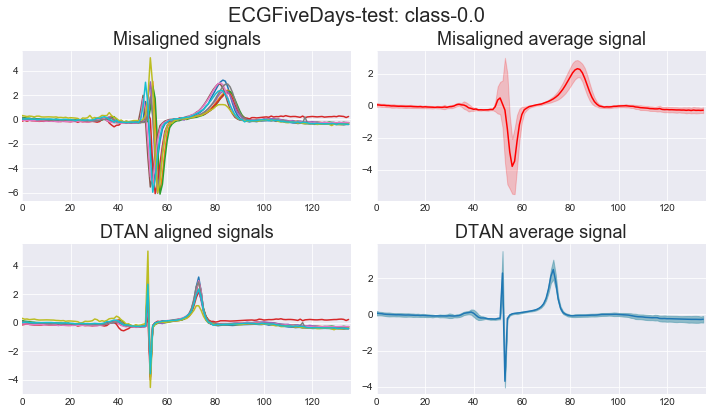

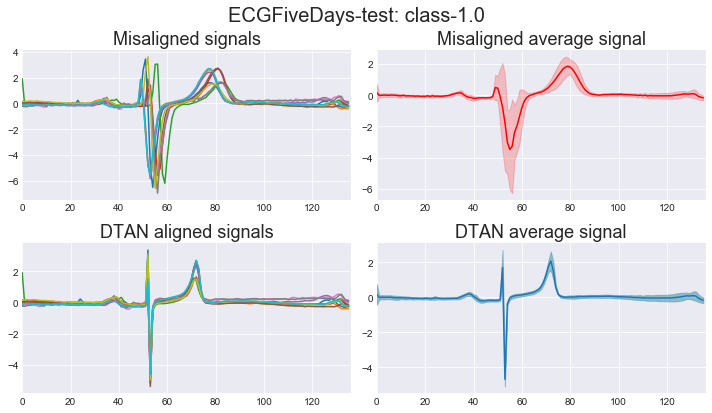

In [14]:
model = expManager[exp_2].get_DTAN_model()
plot_signals(model, device, datadir, dataset_name)